# Problem Statement 19

                      State name              District name  Population  \
0              JAMMU AND KASHMIR                    Kupwara    870354.0   
1              JAMMU AND KASHMIR                     Badgam    753745.0   
2              JAMMU AND KASHMIR                Leh(Ladakh)    133487.0   
3              JAMMU AND KASHMIR                     Kargil    140802.0   
4              JAMMU AND KASHMIR                      Punch         NaN   
..                           ...                        ...         ...   
635                  PONDICHERRY                       Mahe     41816.0   
636                  PONDICHERRY                   Karaikal    200222.0   
637  ANDAMAN AND NICOBAR ISLANDS                   Nicobars     36842.0   
638  ANDAMAN AND NICOBAR ISLANDS  North  AND Middle Andaman    105597.0   
639  ANDAMAN AND NICOBAR ISLANDS              South Andaman         NaN   

     District count  Population Density  
0                22        39561.545455  
1              

C:\Users\harsh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


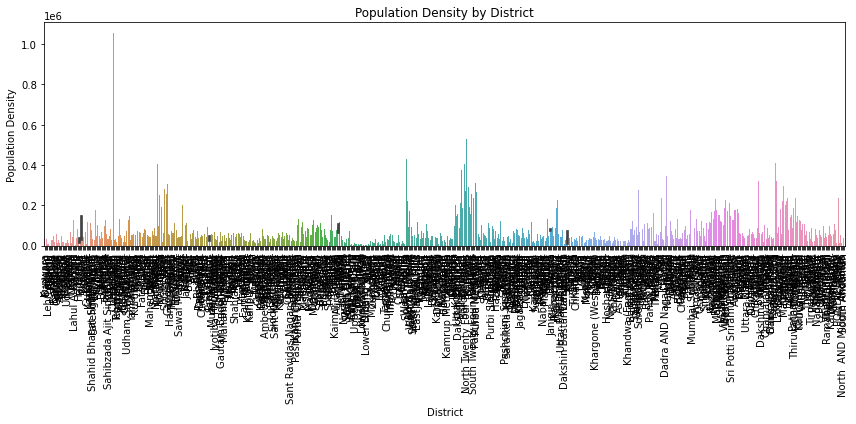

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('census_2011.csv')

relevant_columns = ['State name','District name','Population']
df = df[relevant_columns]

districts_count = df.groupby('State name')['District name'].count().reset_index()
districts_count.columns = ['State name', 'District count']
df = pd.merge(df, districts_count, on='State name', how='left')
df['Population Density'] = df['Population'] / df['District count']
print(df)

plt.figure(figsize=(12, 6))
sns.barplot(x='District name', y='Population Density', data=df)
plt.xticks(rotation=90)
plt.title('Population Density by District')
plt.xlabel('District')
plt.ylabel('Population Density')
plt.tight_layout()
plt.show()

# Problem Statement 19

Empty DataFrame
Columns: [State/UT, Population, Number of Hospitals, Number of Beds Total]
Index: []
--------------------------------------------------------
                      State/UT   Population
0  ANDAMAN AND NICOBAR ISLANDS     142439.0
1               ANDHRA PRADESH  236246814.0
2            ARUNACHAL PRADESH    3874953.0
3                        ASSAM   85610952.0
4                        BIHAR  305640918.0
--------------------------------------------------------
Empty DataFrame
Columns: [State/UT, Population, Number of Hospitals]
Index: []


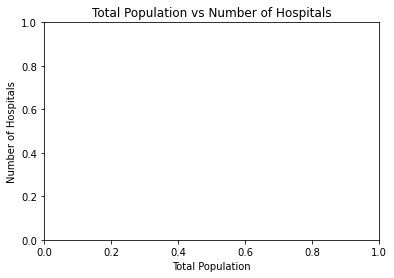

In [6]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('AYUSHHospitals.csv')

# Calculate the sum across the sub-columns
df['Number of Hospitals'] = df[[ 'Number of Hospitals', 'Unnamed: 3', 'Unnamed: 4']].sum(axis=1)

# Drop the sub-columns
df.drop(columns=[ 'Number of Hospitals', 'Unnamed: 3','Unnamed: 4'], inplace=True)

df['Number of Beds Total'] = df[['Unnamed: 9']]

df.drop(columns=['Number of Beds','Unnamed: 7','Unnamed: 8','Unnamed: 9','Srl no.'], inplace=True)

# Rename the 'Main Column' to something more appropriate if needed
df.rename(columns={'Unnamed: 5': 'Number of Hospitals'}, inplace=True)
df.rename(columns={'State / UT':'State/UT'},inplace=True)

# df = df[['New Name', 'Sum']]

# Write the updated DataFrame back to a CSV file
df.to_csv('updated_file_Ayush.csv', index=False)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load census data
census_df = pd.read_csv('census.csv')

# Load AYUSH hospital data
ayush_df = pd.read_csv('updated_file_Ayush.csv',skiprows=[1, 2])


# Combine population for total population for States/UT
total_population_df = census_df.groupby('State/UT', as_index=False)['Population'].sum()

# Merge census data with AYUSH data on the 'State/UT' column
merged_df = pd.merge(total_population_df, ayush_df, on='State/UT')


# Check merged dataframe
print(merged_df.head())
print('--------------------------------------------------------')
# Convert 'Number of Hospitals' column to numeric
merged_df['Number of Hospitals'] = pd.to_numeric(merged_df['Number of Hospitals'], errors='coerce')

# Check total population dataframe
print(total_population_df.head())

# Compare 'Population' with 'Number of Hospitals'
comparison_df = pd.merge(total_population_df, merged_df[['State/UT', 'Number of Hospitals']], on='State/UT')
print('--------------------------------------------------------')
# Check comparison dataframe
print(comparison_df.head())

# Plotting using seaborn
sns.scatterplot(x='Population', y='Number of Hospitals', data=comparison_df)
plt.title('Total Population vs Number of Hospitals')
plt.xlabel('Total Population')
plt.ylabel('Number of Hospitals')
plt.show()

# Problem Statement 20

                state          district  population  area_km2
0      Andhra Pradesh     Visakhapatnam     4290589      5350
1   Arunachal Pradesh        Papum Pare      222976      2875
2               Assam            Kamrup     1260419      1527
3               Bihar             Patna     6590839      3202
4        Chhattisgarh            Raipur     1853585      2264
5                 Goa         North Goa      818008      1736
6             Gujarat         Ahmedabad     7208200       464
7             Haryana           Gurgaon     1531500      1251
8    Himachal Pradesh            Shimla      813384      5131
9     Jammu & Kashmir          Srinagar     1236829       294
10          Jharkhand            Ranchi     2912022      5097
11          Karnataka         Bengaluru    11895170       741
12             Kerala         Ernakulam     3279860      3058
13     Madhya Pradesh            Indore     3272335      3898
14        Maharashtra            Mumbai    20908000       603
15      

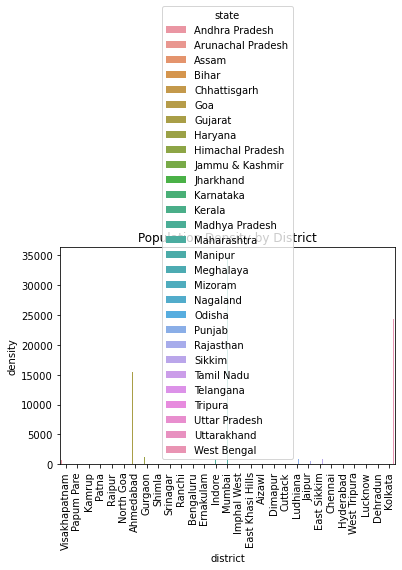

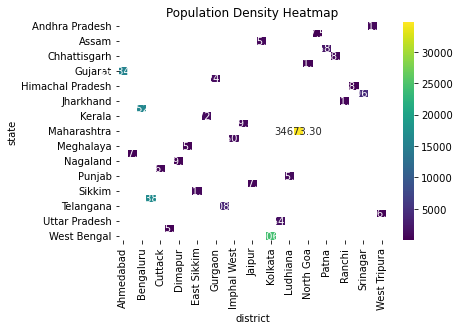

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample population data
main_districts_population = pd.DataFrame({
    'state': [
        'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
        'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'
    ],
    'district': [
        'Visakhapatnam', 'Papum Pare', 'Kamrup', 'Patna', 'Raipur', 'North Goa', 'Ahmedabad', 'Gurgaon', 'Shimla', 'Srinagar',
        'Ranchi', 'Bengaluru', 'Ernakulam', 'Indore', 'Mumbai', 'Imphal West', 'East Khasi Hills', 'Aizawl', 'Dimapur', 'Cuttack',
        'Ludhiana', 'Jaipur', 'East Sikkim', 'Chennai', 'Hyderabad', 'West Tripura', 'Lucknow', 'Dehradun', 'Kolkata'
    ],
    'population': [
        4290589, 222976, 1260419, 6590839, 1853585, 818008, 7208200, 1531500, 813384, 1236829,
        2912022, 11895170, 3279860, 3272335, 20908000, 550250, 1223000, 1100000, 379768, 2622096,
        3487882, 6660526, 610577, 7088000, 4026585, 917534, 3677188, 1004572, 4496694
    ]
})

# Sample area data
main_districts_area = pd.DataFrame({
    'state': [
        'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
        'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'
    ],
    'district': [
        'Visakhapatnam', 'Papum Pare', 'Kamrup', 'Patna', 'Raipur', 'North Goa', 'Ahmedabad', 'Gurgaon', 'Shimla', 'Srinagar',
        'Ranchi', 'Bengaluru', 'Ernakulam', 'Indore', 'Mumbai', 'Imphal West', 'East Khasi Hills', 'Aizawl', 'Dimapur', 'Cuttack',
        'Ludhiana', 'Jaipur', 'East Sikkim', 'Chennai', 'Hyderabad', 'West Tripura', 'Lucknow', 'Dehradun', 'Kolkata'
    ],
    'area_km2': [
        5350, 2875, 1527, 3202, 2264, 1736, 464, 1251, 5131, 294,
        5097, 741, 3058, 3898, 603, 519, 2748, 3576, 927, 3932,
        3767, 11143, 709, 426, 1116, 2990, 2528, 3088, 185
    ]
})

# Combine population and area data
combined_data = pd.merge(main_districts_population, main_districts_area, on=['state', 'district'])

print(combined_data)
# Calculate population density
combined_data['density'] = combined_data['population'] / combined_data['area_km2']

# Display the data with population density
print(combined_data[['state', 'district', 'population', 'area_km2', 'density']])

# Find the most densely populated district in each state
most_dense_districts = combined_data.loc[combined_data.groupby('state')['density'].idxmax()]

print(most_dense_districts[['state', 'district', 'density']])
# Create a bar plot of population densities by district
sns.barplot(data=combined_data, x='district', y='density', hue='state')
plt.title("Population Density by District")
plt.xticks(rotation=90)
plt.show()

# Create a heatmap to visualize densities across districts and states
pivot = combined_data.pivot(index="state", columns="district", values="density")
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title("Population Density Heatmap")
plt.show()

# Problem Statement 21

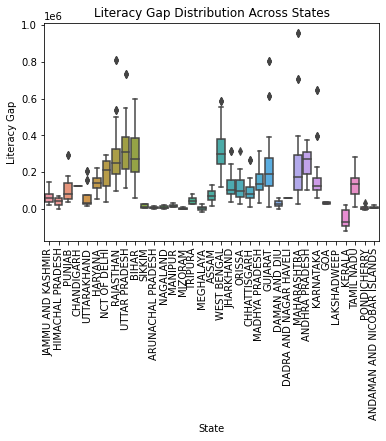

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


relevant_columns = ['District Code', 'State name', 'District name', 'Male', 'Female', 'Male_Literate', 'Female_Literate']
census_data = pd.read_csv("census.csv")

#calculating the literacy gaps
census_data['Literacy_Gap'] = census_data['Male_Literate'] - census_data['Female_Literate']

#mean of the gaps
statewise_data = census_data.groupby('State/UT')['Literacy_Gap'].mean()

#use of barplot
sns.boxplot(x='State/UT', y='Literacy_Gap', data=census_data)
plt.xticks(rotation=90)
plt.title('Literacy Gap Distribution Across States')
plt.xlabel('State')
plt.ylabel('Literacy Gap')
plt.show()

# Problem Statement 22

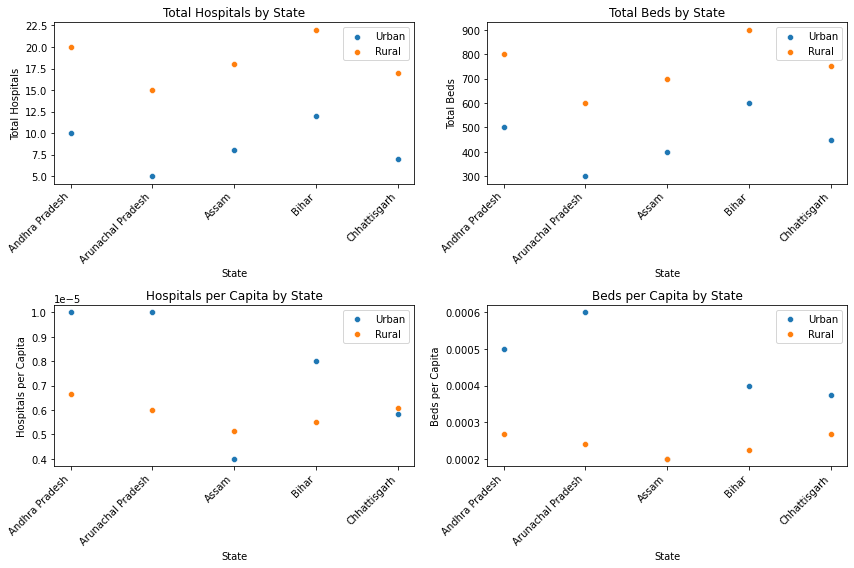

In [10]:
data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'Urban_Hospitals': [10, 5, 8, 12, 7],
    'Rural_Hospitals': [20, 15, 18, 22, 17],
    'Urban_Beds': [500, 300, 400, 600, 450],
    'Rural_Beds': [800, 600, 700, 900, 750],
    'Urban_Population': [1000000, 500000, 2000000, 1500000, 1200000],
    'Rural_Population': [3000000, 2500000, 3500000, 4000000, 2800000]
}

df = pd.DataFrame(data)

df['Total_Hospitals_Urban'] = df['Urban_Hospitals']
df['Total_Hospitals_Rural'] = df['Rural_Hospitals']
df['Total_Beds_Urban'] = df['Urban_Beds']
df['Total_Beds_Rural'] = df['Rural_Beds']

df['Hospitals_Per_Capita_Urban'] = df['Urban_Hospitals'] / df['Urban_Population']
df['Hospitals_Per_Capita_Rural'] = df['Rural_Hospitals'] / df['Rural_Population']
df['Beds_Per_Capita_Urban'] = df['Urban_Beds'] / df['Urban_Population']
df['Beds_Per_Capita_Rural'] = df['Rural_Beds'] / df['Rural_Population']

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='State', y='Total_Hospitals_Urban', label='Urban')
sns.scatterplot(data=df, x='State', y='Total_Hospitals_Rural', label='Rural')
plt.title('Total Hospitals by State')
plt.xlabel('State')
plt.ylabel('Total Hospitals')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='State', y='Total_Beds_Urban', label='Urban')
sns.scatterplot(data=df, x='State', y='Total_Beds_Rural', label='Rural')
plt.title('Total Beds by State')
plt.xlabel('State')
plt.ylabel('Total Beds')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='State', y='Hospitals_Per_Capita_Urban', label='Urban')
sns.scatterplot(data=df, x='State', y='Hospitals_Per_Capita_Rural', label='Rural')
plt.title('Hospitals per Capita by State')
plt.xlabel('State')
plt.ylabel('Hospitals per Capita')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='State', y='Beds_Per_Capita_Urban', label='Urban')
sns.scatterplot(data=df, x='State', y='Beds_Per_Capita_Rural', label='Rural')
plt.title('Beds per Capita by State')
plt.xlabel('State')
plt.ylabel('Beds per Capita')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

# Problem Statement 23

AYUSH Hospitals Data:
             state/UT  number_of_hospitals_govt  \
0      Andhra Pradesh                         8   
1   Arunachal Pradesh                        11   
2               Assam                         4   
3               Bihar                         8   
4        Chhattisgarh                         7   
5                 Goa                         4   
6             Gujarat                         0   
7             Haryana                        35   
8    Himachal Pradesh                         4   
9     Jammu & Kashmir                        34   
10          Jharkhand                         2   
11          Karnataka                         1   
12             Kerala                       156   
13     Madhya Pradesh                       162   
14        Maharashtra                        23   
15            Manipur                         5   
16          Meghalaya                        10   
17            Mizoram                        10   
18       

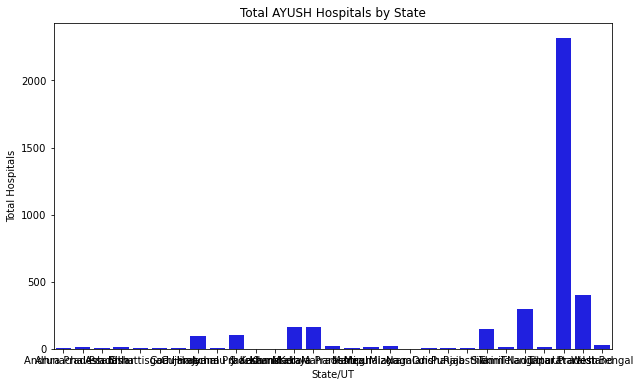

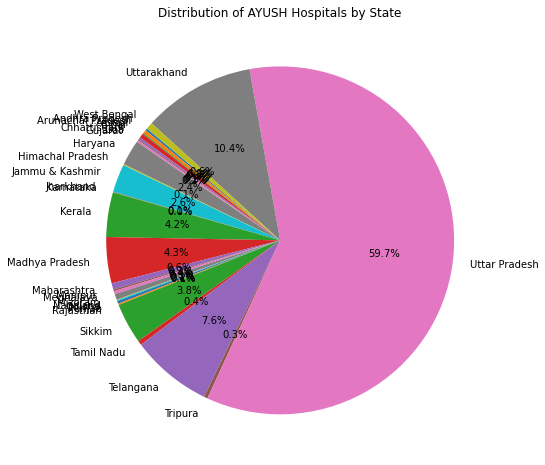

In [11]:
import pandas as pd

# Sample dataset for AYUSH hospitals
ayush_hospitals_data = pd.DataFrame({
    'state/UT': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
        'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
    'number_of_hospitals_govt': [8,11,4,8,7,4,0,35,4,34,2,1,156,162,23,5,10,10,2,2,9,5,137,1,293,4,2315,404,11],
    'number_of_hospitals_local_and_others':[0,1,0,8,1,0,7,57,0,66,0,0,5,4,0,1,1,11,0,2,0,0,9,15,0,9,0,0,14],
    'number_of_beds': [365,100,205,950,370,390,0,1495,145,710,75,50,2455,4054,690,812,0,100,100,10,593,100,1391,10,2381,60,11361,2023,530]
})

print("AYUSH Hospitals Data:")
print(ayush_hospitals_data)

# Aggregate the number of hospitals by state
ayush_hospitals_data['total_hospitals'] = ayush_hospitals_data['number_of_hospitals_govt'] + ayush_hospitals_data['number_of_hospitals_local_and_others']

# Display the aggregated data
print("Total Hospitals and Beds by State:")
print(ayush_hospitals_data[['state/UT', 'total_hospitals', 'number_of_beds']])

import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the number of AYUSH hospitals by state
plt.figure(figsize=(10, 6))
sns.barplot(data=ayush_hospitals_data, x='state/UT', y='total_hospitals', color='b')
plt.title("Total AYUSH Hospitals by State")
plt.xlabel("State/UT")
plt.ylabel("Total Hospitals")
plt.show()

# Pie chart for the distribution of AYUSH hospitals across states
plt.figure(figsize=(8, 8))
plt.pie(ayush_hospitals_data['total_hospitals'], labels=ayush_hospitals_data['state/UT'], autopct='%1.1f%%', startangle=140)
plt.title("Distribution of AYUSH Hospitals by State")
plt.show()

# Problem Statement 24

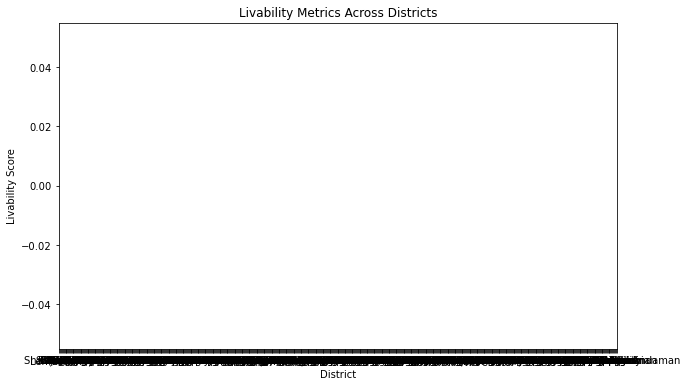

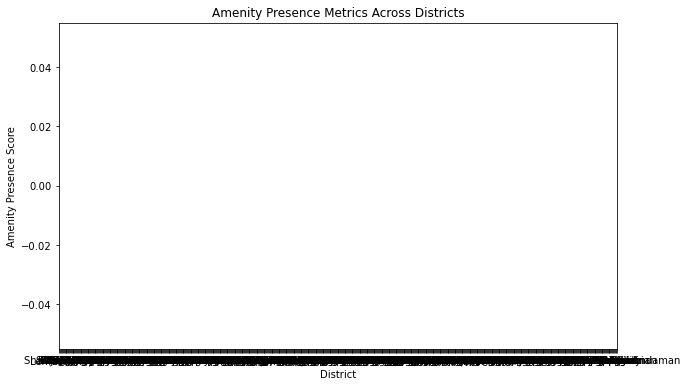

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the housing data
housing_data = pd.read_csv('housing.csv')

# Calculate livability metrics
livability_metrics = housing_data[['MSL_Electricty', 'H_latrine_premoses']].mean()

# Create a bar chart to compare livability metrics across districts
plt.figure(figsize=(10,6))
sns.barplot(x=housing_data['District Name'], y=livability_metrics)
plt.title('Livability Metrics Across Districts')
plt.xlabel('District')
plt.ylabel('Livability Score')
plt.show()

# Calculate amenity presence metrics
amenity_metrics = housing_data[['Within_premises','Near_premises']].mean()

# Create a bar chart to compare amenity presence metrics across districts
plt.figure(figsize=(10,6))
sns.barplot(x=housing_data['District Name'], y=amenity_metrics)
plt.title('Amenity Presence Metrics Across Districts')
plt.xlabel('District')
plt.ylabel('Amenity Presence Score')
plt.show()

# Problem Statement 25

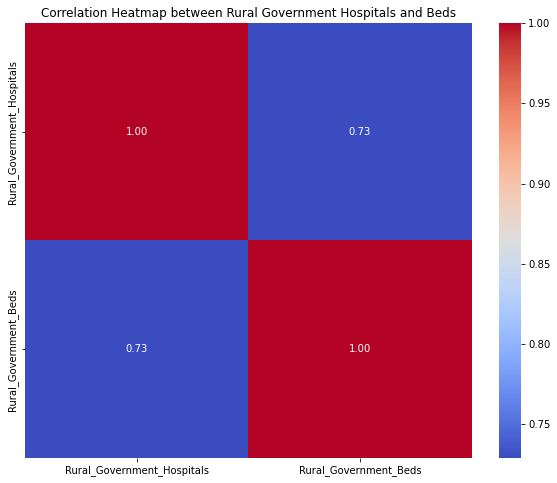

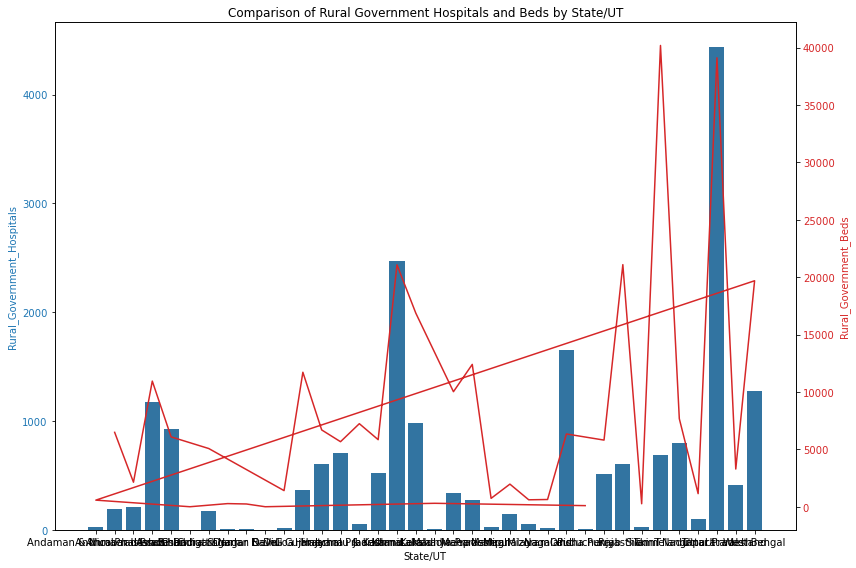

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data manually from government_hospitals dataset for getting the required parameters for plotting the heatmap
import pandas as pd

data = {
    "State/UT": ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Lakshadweep', 'Puducherry'],
    "Rural_Government_Hospitals": [193, 208, 1176, 930, 169, 17, 364, 609, 705, 56, 519, 2471, 981, 334, 273, 23, 143, 56, 21, 1655, 510, 602, 24, 692, 802, 99, 4442, 410, 1272, 27, 0, 10, 5, 0, 9, 3],
    "Rural_Government_Beds": [6480, 2136, 10944, 6083, 5070, 1405, 11715, 6690, 5665, 7234, 5842, 21072, 16865, 10020, 12398, 730, 1970, 604, 630, 6339, 5805, 21088, 260, 40179, 7668, 1140, 39104, 3284, 19684, 575, 0, 273, 240, 0, 300, 96]
}

df = pd.DataFrame(data)

# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
df['State/UT'] = df['State/UT'].astype('category')
df_corr = df.drop('State/UT', axis=1).corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Rural Government Hospitals and Beds')
plt.show()

# Multi-axis plot to visualize both Rural_Government_Hospitals and Rural_Government_Beds
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel('States/UT')
ax1.set_ylabel('Rural_Government_Hospitals', color=color)
sns.barplot(x='State/UT', y='Rural_Government_Hospitals', data=df, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rural_Government_Beds', color=color)
sns.lineplot(x='State/UT', y='Rural_Government_Beds', data=df, sort=False, ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparison of Rural Government Hospitals and Beds by State/UT')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

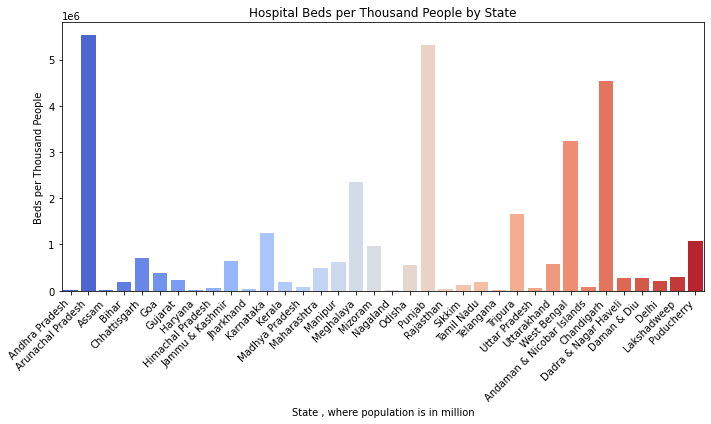

In [16]:
hospital_data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Lakshadweep', 'Puducherry'],
    'Total_Beds': [1246,60799,232,19115,17796,3756,14354,568,298,20572,2666,41129,13841,8706,11342,7404,56333,39511,250,38140,68998,2562,4585,2312,1944,16497,4462,13527,51844,1145,72616,17358,4895,58310,6660,51163]
}

population_data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Lakshadweep', 'Puducherry'],
    'Population': [49,11,31,104,25,10,60,25,6,32,61,33,72,112,23,12,24,41,27,68,13,72,35,13,199,10,91,23,16,15,16,64,18,274,23,48] # population in million
}

hospital_df = pd.DataFrame(hospital_data)
population_df = pd.DataFrame(population_data)

merged_df = pd.merge(hospital_df, population_df, on='State')

merged_df['Beds_Per_Thousand'] = (merged_df['Total_Beds'] / merged_df['Population']) * 1000

plt.figure(figsize=(10, 6))

sns.barplot(data=merged_df, x='State', y='Beds_Per_Thousand', palette='coolwarm', saturation=0.95)
plt.title('Hospital Beds per Thousand People by State')
plt.xlabel('State , where population is in million')
plt.ylabel('Beds per Thousand People')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Problem Statement 26

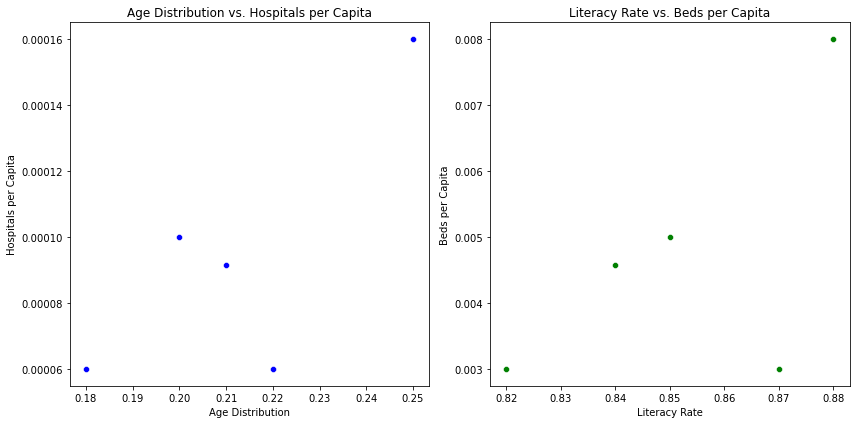

In [17]:
census_data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'Population': [1000000, 500000, 2000000, 1500000, 1200000],
    'Age_Distribution': [0.2, 0.25, 0.18, 0.22, 0.21],
    'Gender_Ratio': [0.49, 0.51, 0.48, 0.52, 0.5],
    'Literacy_Rate': [0.85, 0.88, 0.82, 0.87, 0.84]
}

hospital_data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'Total_Hospitals': [100, 80, 120, 90, 110],
    'Total_Beds': [5000, 4000, 6000, 4500, 5500]
}

census_df = pd.DataFrame(census_data)
hospital_df = pd.DataFrame(hospital_data)

hospital_df['Hospitals_Per_Capita'] = hospital_df['Total_Hospitals'] / census_df['Population']
hospital_df['Beds_Per_Capita'] = hospital_df['Total_Beds'] / census_df['Population']

merged_df = pd.merge(census_df, hospital_df, on='State')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_df, x='Age_Distribution', y='Hospitals_Per_Capita', color='blue')
plt.title('Age Distribution vs. Hospitals per Capita')
plt.xlabel('Age Distribution')
plt.ylabel('Hospitals per Capita')

plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_df, x='Literacy_Rate', y='Beds_Per_Capita', color='green')
plt.title('Literacy Rate vs. Beds per Capita')
plt.xlabel('Literacy Rate')
plt.ylabel('Beds per Capita')

plt.tight_layout()
plt.show()